In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic["age"] = titanic["age"].replace(["?"], [None]).astype("float")
titanic["fare"] = titanic["fare"].replace(["?"], [None]).astype("float")

In [4]:
def yer_to_day(yrs):
    return yrs*365

titanic["age"].apply(yer_to_day) #apply the function on all input


0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [13]:
def get_age_group(age):
    if age< 1:
        return "infant"
    elif age<12:
        return "childern"
    elif age<18:
        return "teen"
    elif age<50:
        return "adult"
    else:
        return "senior"
titanic["age"].apply(get_age_group)   

0          adult
1         infant
2       childern
3          adult
4          adult
          ...   
1304        teen
1305      senior
1306       adult
1307       adult
1308       adult
Name: age, Length: 1309, dtype: object

In [14]:
titanic["age_group"]=titanic["age"].apply(get_age_group)

In [16]:
titanic["age_group"].value_counts()

adult       782
senior      373
childern     79
teen         63
infant       12
Name: age_group, dtype: int64

In [19]:
titanic.groupby("age_group").survived.mean() # infant mor survived

age_group
adult       0.386189
childern    0.518987
infant      0.833333
senior      0.313673
teen        0.476190
Name: survived, dtype: float64

In [25]:
titanic.groupby("sex").survived.mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

<AxesSubplot:ylabel='survived'>

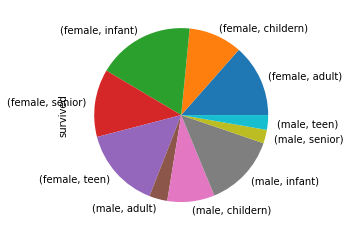

In [22]:
titanic.groupby(["sex","age_group"]).survived.mean().plot(kind="pie") 

In [27]:
titanic.groupby(["age_group","sex"]).survived.mean() 

age_group  sex   
adult      female    0.748201
           male      0.186508
childern   female    0.552632
           male      0.487805
infant     female    1.000000
           male      0.750000
senior     female    0.698276
           male      0.140078
teen       female    0.833333
           male      0.151515
Name: survived, dtype: float64

<AxesSubplot:ylabel='survived'>

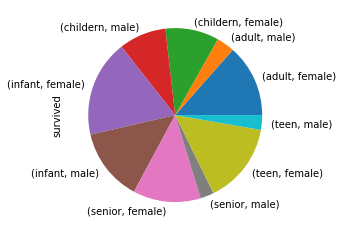

In [28]:
titanic.groupby(["age_group","sex"]).survived.mean().plot(kind="pie") # infat male most thing

In [30]:
titanic["fare"]*23

0       4860.7625
1       3485.6500
2       3485.6500
3       3485.6500
4       3485.6500
          ...    
1304     332.4466
1305     332.4466
1306     166.1750
1307     166.1750
1308     181.1250
Name: fare, Length: 1309, dtype: float64

In [34]:
titanic["fare"].apply(lambda x: f"${x*24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [39]:
def convert_currency(num,multiplier):
    return f"${num*multiplier}"

In [40]:
convert_currency(2,24)

'$48'

In [42]:
titanic["fare"].apply(convert_currency, args=(24,))  # arg tuble dont forget , of end that to tell pyton im tuble

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [43]:
df = titanic[["pclass", "survived", "age", "fare"]]

In [44]:
df

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500
...,...,...,...,...
1304,3,0,14.5000,14.4542
1305,3,0,NaN,14.4542
1306,3,0,26.5000,7.2250
1307,3,0,27.0000,7.2250


In [47]:
def get_range(s):
    
    return s.max() -s.min()

In [48]:
df.apply(get_range)

pclass        2.0000
survived      1.0000
age          79.8333
fare        512.3292
dtype: float64

In [49]:
df.apply(get_range, axis=1) #each raw

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [53]:
def get_fam_size(s):
    fam_size= s.sibsp+s.parch
    if fam_size==0:
        return "solo"
    elif fam_size<5:
        return "averge"
    else:
        return "large"

In [55]:
titanic.apply(get_fam_size ,axis=1) #axis=0 dirction by colum but axis=1 dirction raw

0         solo
1       averge
2       averge
3       averge
4       averge
         ...  
1304    averge
1305    averge
1306      solo
1307      solo
1308      solo
Length: 1309, dtype: object

In [58]:
titanic["fame_size"]=titanic.apply(get_fam_size ,axis=1)

In [59]:
titanic["fame_size"].value_counts()

solo      790
averge    459
large      60
Name: fame_size, dtype: int64

In [61]:
titanic.groupby("fame_size").survived.mean()

fame_size
averge    0.549020
large     0.150000
solo      0.302532
Name: survived, dtype: float64

In [62]:
titanic.groupby(["fame_size","sex" ]).survived.mean()

fame_size  sex   
averge     female    0.771429
           male      0.294393
large      female    0.296296
           male      0.030303
solo       female    0.731959
           male      0.162752
Name: survived, dtype: float64

In [65]:
titanic["pclass"].map({1:"1st", 2:"2nd", 3:"3rd"})# map serise method

0       1st
1       1st
2       1st
3       1st
4       1st
       ... 
1304    3rd
1305    3rd
1306    3rd
1307    3rd
1308    3rd
Name: pclass, Length: 1309, dtype: object

In [66]:
titanic["age"].map(lambda a:a<18)

0       False
1        True
2        True
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [67]:
titanic[["name", "sex", "age_group"]].applymap(str.upper) # applymap run function on each value in date frame

,name,sex,age_group
0,"ALLEN, MISS. ELISABETH WALTON",FEMALE,ADULT
1,"ALLISON, MASTER. HUDSON TREVOR",MALE,INFANT
2,"ALLISON, MISS. HELEN LORAINE",FEMALE,CHILDERN
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON",MALE,ADULT
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)",FEMALE,ADULT
...,...,...,...
1304,"ZABOUR, MISS. HILENI",FEMALE,TEEN
1305,"ZABOUR, MISS. THAMINE",FEMALE,SENIOR
1306,"ZAKARIAN, MR. MAPRIEDEDER",MALE,ADULT
1307,"ZAKARIAN, MR. ORTIN",MALE,ADULT


In [68]:
df.applymap(lambda el: el * 7)

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750


In [69]:
df * 7

,pclass,survived,age,fare
0,7,7,203.0000,1479.3625
1,7,7,6.4169,1060.8500
2,7,0,14.0000,1060.8500
3,7,0,210.0000,1060.8500
4,7,0,175.0000,1060.8500
...,...,...,...,...
1304,21,0,101.5000,101.1794
1305,21,0,NaN,101.1794
1306,21,0,185.5000,50.5750
1307,21,0,189.0000,50.5750
